<a href="https://colab.research.google.com/github/FeisTfue/distancias-clustering/blob/main/Distancia_coseno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La distancia del coseno se utiliza para medir la similitud angular entre los puntos, por lo que los puntos se agruparán en función de sus direcciones en lugar de sus distancias euclidianas.

Puntos en el primer clúster:
Punto 1: Altura = 185, Peso = 72
Punto 4: Altura = 179, Peso = 68
Punto 5: Altura = 182, Peso = 72
Punto 6: Altura = 188, Peso = 77

Puntos en el segundo clúster:
Punto 2: Altura = 170, Peso = 56
Punto 3: Altura = 168, Peso = 60


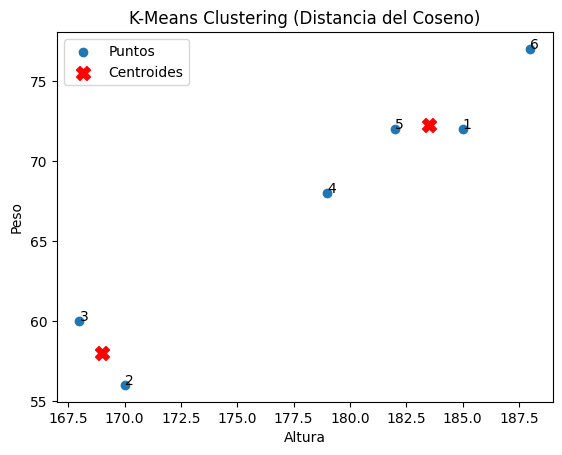

In [6]:
import numpy as np  # Importamos la biblioteca NumPy para manejar arrays y realizar cálculos numéricos
import matplotlib.pyplot as plt  # Importamos Matplotlib para graficar los resultados

# Definimos nuestros datos. Cada fila representa un punto con un ID, Altura y Peso.
data = np.array([
    [1, 185, 72],
    [2, 170, 56],
    [3, 168, 60],
    [4, 179, 68],
    [5, 182, 72],
    [6, 188, 77]
])

# Definimos los centroides iniciales k1 y k2 como puntos en el espacio de altura y peso.
k1 = np.array([185, 72])
k2 = np.array([170, 56])

# Inicializamos dos listas para asignar puntos a los clusters 1 y 2.
cluster1 = []
cluster2 = []

# Realizamos un número determinado de iteraciones del algoritmo K-Means.
num_iteraciones = 10
for _ in range(num_iteraciones):
    # En cada iteración, asignamos los puntos a los centroides más cercanos.
    cluster1 = []
    cluster2 = []

    for punto in data:
        # Calculamos la distancia del coseno entre el punto y el centroide k1.
        distancia_a_k1 = 1 - np.dot(punto[1:], k1) / (np.linalg.norm(punto[1:]) * np.linalg.norm(k1))

        # Calculamos la distancia del coseno entre el punto y el centroide k2.
        distancia_a_k2 = 1 - np.dot(punto[1:], k2) / (np.linalg.norm(punto[1:]) * np.linalg.norm(k2))

        # Asignamos el punto al cluster con el centroide más cercano (menor distancia de coseno).
        if distancia_a_k1 < distancia_a_k2:
            cluster1.append(punto)
        else:
            cluster2.append(punto)

    # Actualizamos los centroides tomando la media de los puntos en cada cluster.
    k1 = np.mean(cluster1, axis=0)[1:]
    k2 = np.mean(cluster2, axis=0)[1:]

# Imprimimos los resultados de clustering.
print("Puntos en el primer clúster:")
for punto in cluster1:
    print(f"Punto {int(punto[0])}: Altura = {punto[1]}, Peso = {punto[2]}")

print("\nPuntos en el segundo clúster:")
for punto in cluster2:
    print(f"Punto {int(punto[0])}: Altura = {punto[1]}, Peso = {punto[2]}")

# Graficamos los puntos y los centroides.
coordenadas = data[:, 1:]
centroides = np.array([k1, k2])

plt.scatter(coordenadas[:, 0], coordenadas[:, 1], label='Puntos')
plt.scatter(centroides[:, 0], centroides[:, 1], marker='X', s=100, c='red', label='Centroides')

# Agregamos etiquetas a los puntos en el gráfico.
for i, punto in enumerate(data):
    plt.annotate(int(punto[0]), (coordenadas[i, 0], coordenadas[i, 1]))

# Personalizamos el gráfico con títulos y leyendas.
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('K-Means Clustering (Distancia del Coseno)')
plt.legend()
plt.show()
